In [ ]:
# Libraries
import pandas as pd
import numpy as np

In [ ]:
# Load data
titanic = pd.read_csv("train.csv")
# Print the first 5 rows of the dataframe.
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic_test = pd.read_csv("test.csv")
#transpose
titanic_test.head().T
#note their is no Survived column here which is our target varible we are trying to predict

,0,1,2,3,4
PassengerId,892,893,894,895,896
Pclass,3,3,2,3,3
Name,"Kelly, Mr. James","Wilkes, Mrs. James (Ellen Needs)","Myles, Mr. Thomas Francis","Wirz, Mr. Albert","Hirvonen, Mrs. Alexander (Helga E Lindqvist)"
Sex,male,female,male,male,female
Age,34.5,47.0,62.0,27.0,22.0
SibSp,0,1,0,0,1
Parch,0,0,0,0,1
Ticket,330911,363272,240276,315154,3101298
Fare,7.8292,7.0,9.6875,8.6625,12.2875
Cabin,NaN,NaN,NaN,NaN,NaN


In [ ]:
#shape command will give number of rows/samples/examples and number of columns/features/predictors in dataset
#(rows,columns)
titanic.shape

(891, 12)

In [ ]:
#Describe gives statistical information about numerical columns in the dataset
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# age has missing value

In [ ]:
#info method provides information about dataset like
#total values in each column, null/not null, datatype, memory occupied etc
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
#check for missing values
null_columns=titanic.columns[titanic.isnull().any()]
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
#test set??
titanic_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

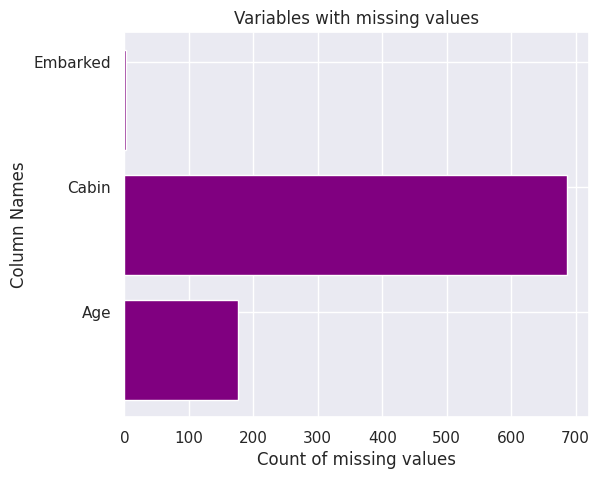

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1)

# pd.options.display.mpl_style = 'default'
labels = []
values = []
for col in null_columns:
    labels.append(col)
    values.append(titanic[col].isnull().sum())
ind = np.arange(len(labels))
width=0.6
fig, ax = plt.subplots(figsize=(6,5))
rects = ax.barh(ind, np.array(values), color='purple')
ax.set_yticks(ind+((width)/2.))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_ylabel("Column Names")
ax.set_title("Variables with missing values");

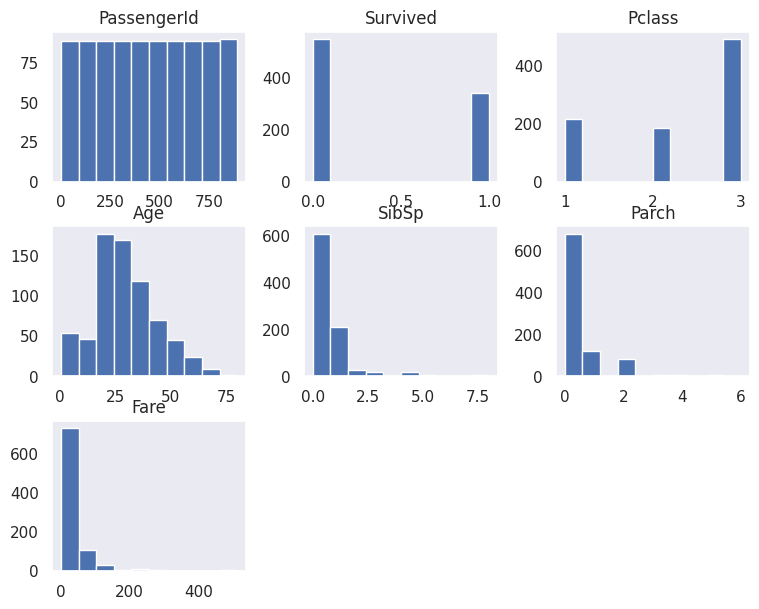

In [ ]:
# visualizations
titanic.hist(bins=10,figsize=(9,7),grid=False);

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:677: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:677: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:677: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:677: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


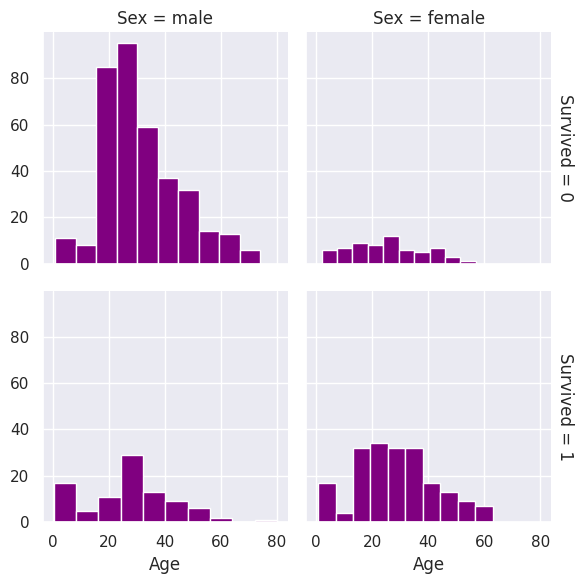

In [ ]:
g = sns.FacetGrid(titanic, col="Sex", row="Survived", margin_titles=True)
g.map(plt.hist, "Age",color="purple");

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:677: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:677: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:677: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:677: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:677: FutureWarning: iteritems is deprecated and will be removed in a fut

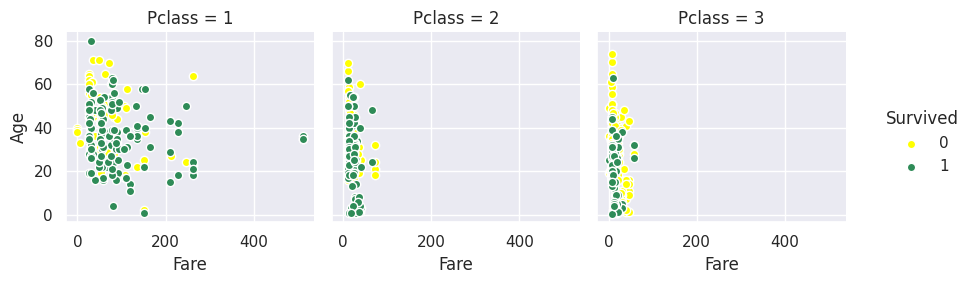

In [ ]:
g = sns.FacetGrid(titanic, hue="Survived", col="Pclass", margin_titles=True,
                  palette={1:"seagreen", 0:"yellow"})
g=g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend();

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:677: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:677: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:677: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:677: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


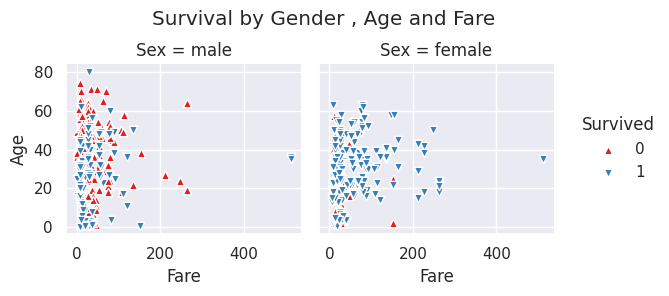

In [ ]:
g = sns.FacetGrid(titanic, hue="Survived", col="Sex", margin_titles=True,
                palette="Set1",hue_kws=dict(marker=["^", "v"]))
g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend()
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Survival by Gender , Age and Fare');

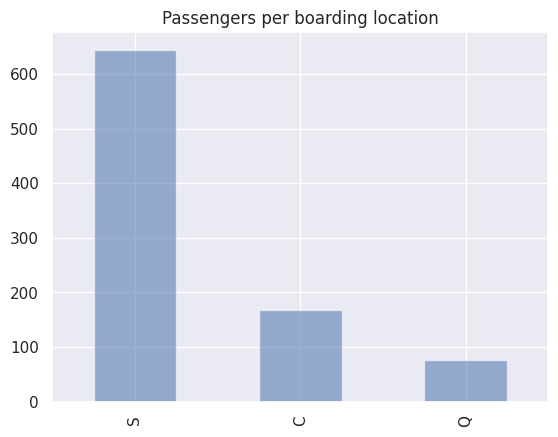

In [ ]:
titanic.Embarked.value_counts().plot(kind='bar', alpha=0.55)
plt.title("Passengers per boarding location");

In [ ]:
%pip install seaborn==0.11.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 283.1/283.1 kB 6.3 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2


In [ ]:
import seaborn as sns

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


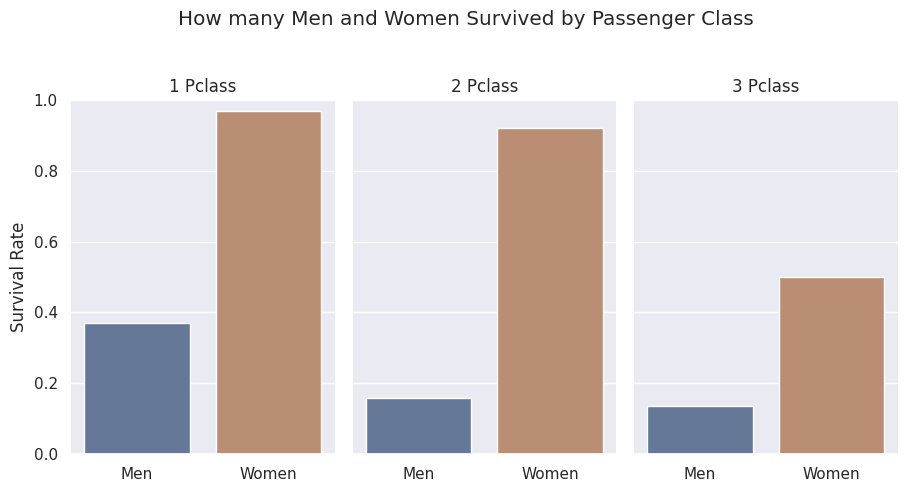

In [ ]:
sns.set(font_scale=1)
g = sns.factorplot(x="Sex", y="Survived", col="Pclass",
                    data=titanic, saturation=.5,
                    kind="bar", ci=None, aspect=.6)
(g.set_axis_labels("", "Survival Rate")
    .set_xticklabels(["Men", "Women"])
    .set_titles("{col_name} {col_var}")
    .set(ylim=(0, 1))
    .despine(left=True))
plt.subplots_adjust(top=0.8)
g.fig.suptitle('How many Men and Women Survived by Passenger Class');

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


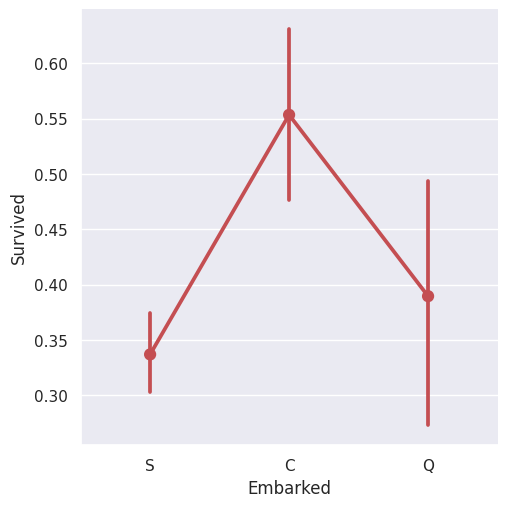

In [ ]:
sns.factorplot(x = 'Embarked',y="Survived", data = titanic,color="r");

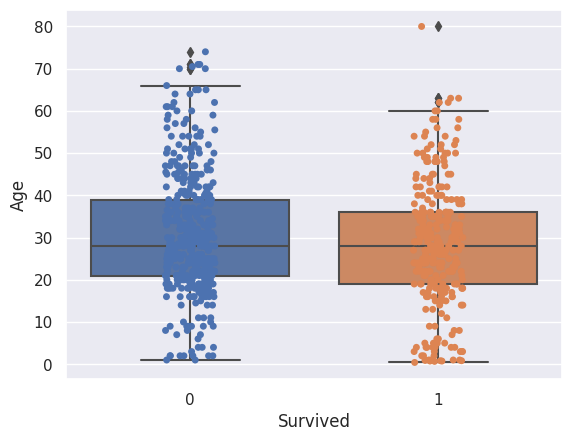

In [ ]:
ax = sns.boxplot(x="Survived", y="Age",
                data=titanic)
ax = sns.stripplot(x="Survived", y="Age",
                   data=titanic, jitter=True,
                   edgecolor="gray")


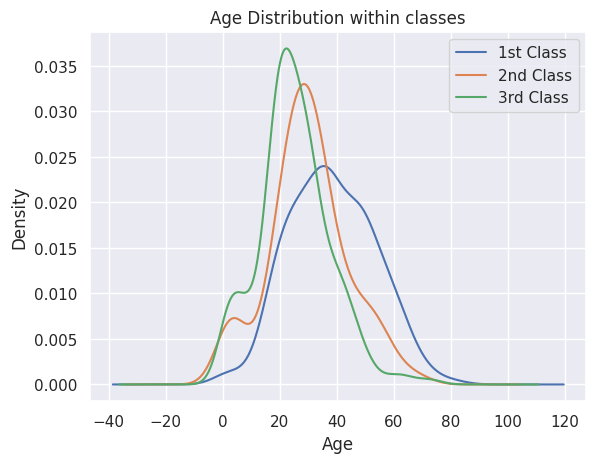

In [ ]:
titanic.Age[titanic.Pclass == 1].plot(kind='kde')
titanic.Age[titanic.Pclass == 2].plot(kind='kde')
titanic.Age[titanic.Pclass == 3].plot(kind='kde')
 # plots an axis lable
plt.xlabel("Age")
plt.title("Age Distribution within classes")
# sets our legend for our graph.
plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best') ;

<ipython-input-21-aad083bc7f78>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=titanic.corr()#["Survived"]


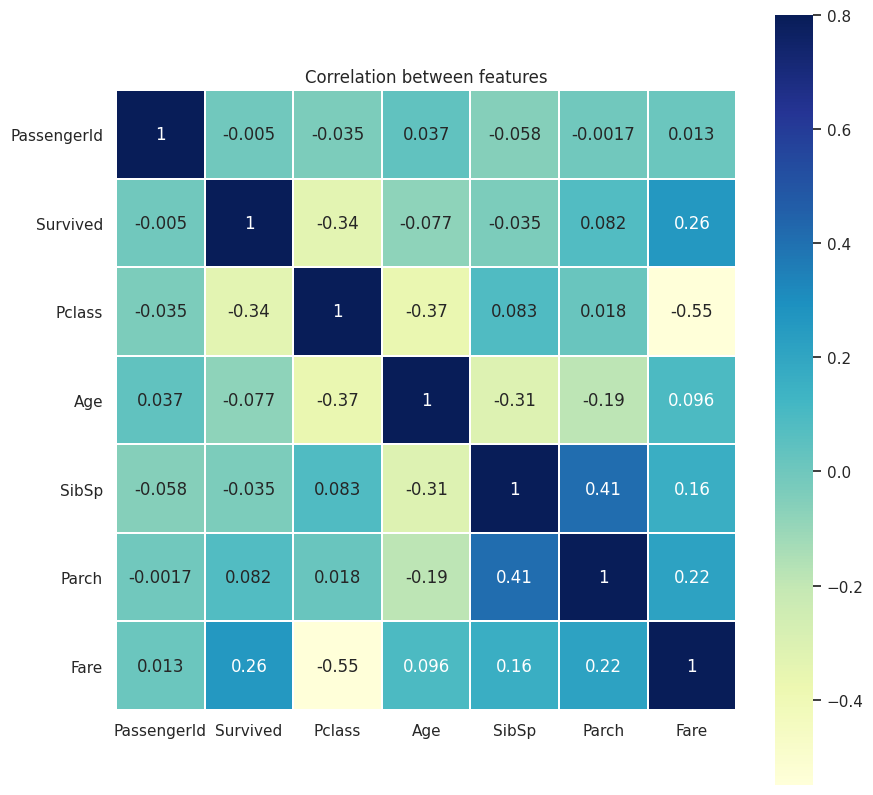

In [ ]:
corr=titanic.corr()#["Survived"]
plt.figure(figsize=(10, 10))

sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between features');

In [ ]:
#correlation of features with target variable
titanic.corr()["Survived"]

<ipython-input-22-445e065b70c3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  titanic.corr()["Survived"]


PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


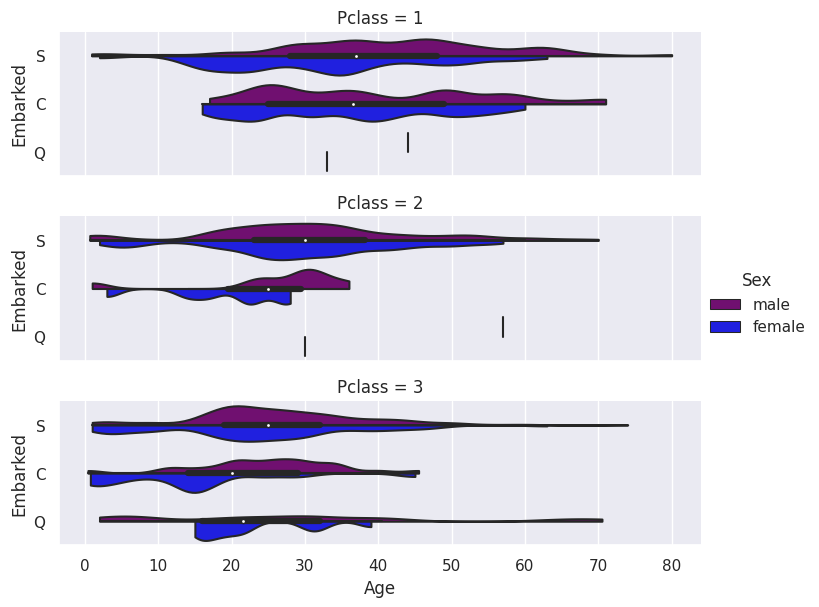

In [ ]:
g = sns.factorplot(x="Age", y="Embarked",
                    hue="Sex", row="Pclass",
                    data=titanic[titanic.Embarked.notnull()],
                    orient="h", size=2, aspect=3.5,
                   palette={'male':"purple", 'female':"blue"},
                    kind="violin", split=True, cut=0, bw=.2);

In [ ]:
#Lets check which rows have null Embarked column
titanic[titanic['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


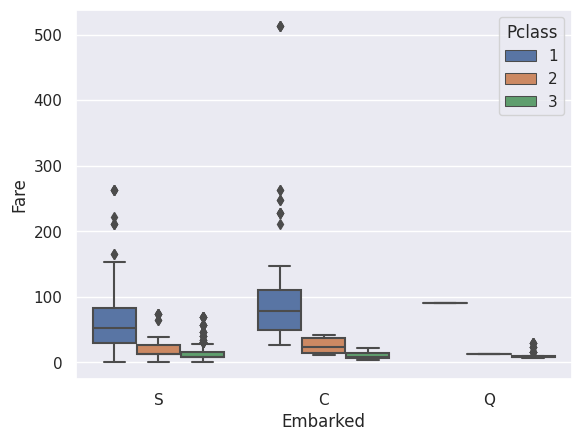

In [ ]:
#missing values to be filled-PassengerId 62 and 830 have missing embarked values

# Both have Passenger class 1 and fare $80.

# Lets plot a graph to visualize and try to guess from where they embarked

sns.boxplot(x="Embarked", y="Fare", hue="Pclass", data=titanic);

In [ ]:
#We can see that for 1st class median line is coming around fare $80 for embarked value 'C'. So we can replace NA values in Embarked column with 'C'
titanic["Embarked"] = titanic["Embarked"].fillna('C')

In [ ]:
#there is an empty fare column in test set
titanic_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
# Fare column
titanic_test[titanic_test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [ ]:
#we can replace missing value in fare by taking median of all fares of those passengers
#who share 3rd Passenger class and Embarked from 'S'
def fill_missing_fare(df):
    median_fare=df[(df['Pclass'] == 3) & (df['Embarked'] == 'S')]['Fare'].median()
#'S'
       #print(median_fare)
    df["Fare"] = df["Fare"].fillna(median_fare)
    return df

titanic_test=fill_missing_fare(titanic_test)

In [ ]:
# Feature engineering - to find where customers were in deck
titanic["Deck"]=titanic.Cabin.str[0]
titanic_test["Deck"]=titanic_test.Cabin.str[0]
titanic["Deck"].unique() # 0 is for null values

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


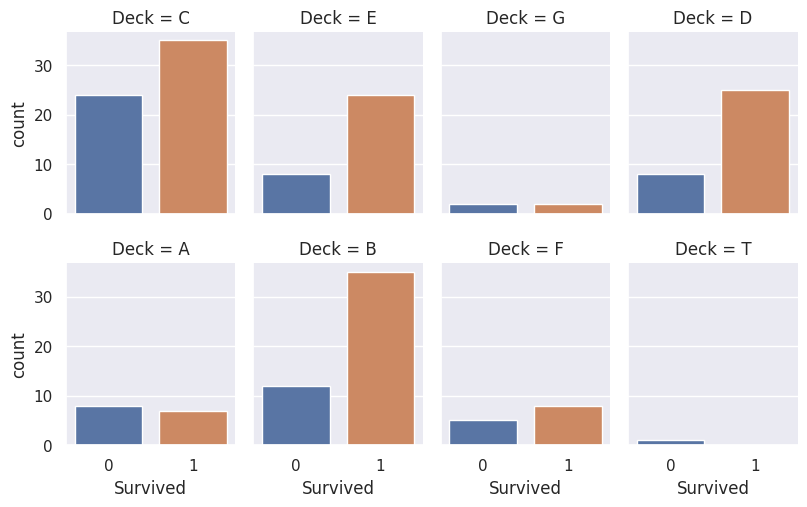

In [ ]:
g = sns.factorplot("Survived", col="Deck", col_wrap=4,
                    data=titanic[titanic.Deck.notnull()],
                    kind="count", size=2.5, aspect=.8);

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:677: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:677: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:677: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


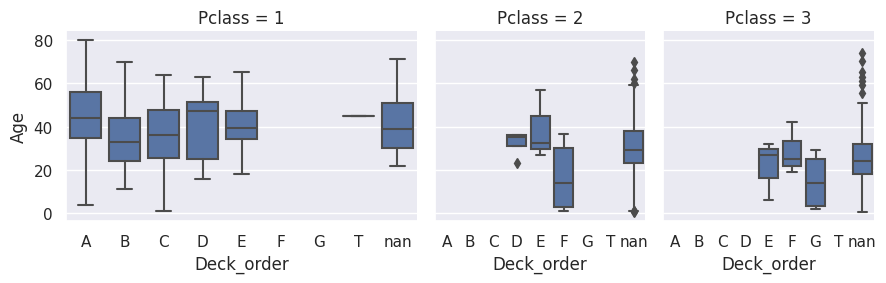

In [ ]:
titanic = titanic.assign(Deck=titanic.Deck.astype(object))

# Create a dictionary that maps each Deck value to a numerical value representing its order
deck_order = {"A": 0, "B": 1, "C": 2, "D": 3, "E": 4, "F": 5, "G": 6, "T": 7, np.nan: 8}

# Create a new column "Deck_order" that maps the Deck values to their corresponding numerical order
titanic = titanic.assign(Deck_order=titanic.Deck.map(deck_order))

g = sns.FacetGrid(titanic, col="Pclass", sharex=False,
                  gridspec_kws={"width_ratios": [5, 3, 3]})

# Use the new "Deck_order" column in the x parameter of the boxplot function, and set the order to be sorted by the numerical order
g.map(sns.boxplot, "Deck_order", "Age", order=sorted(deck_order.values()))

# Set the xticklabels to be the original Deck values, sorted by their numerical order
g.set_xticklabels([key for key, value in sorted(deck_order.items(), key=lambda x: x[1])])


In [ ]:
titanic.Deck.fillna('Z', inplace=True)
titanic_test.Deck.fillna('Z', inplace=True)
titanic["Deck"].unique() # Z is for null values

array(['Z', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [ ]:
# family size
titanic["FamilySize"] = titanic["SibSp"] + titanic["Parch"]+1
titanic_test["FamilySize"] = titanic_test["SibSp"] + titanic_test["Parch"]+1
print(titanic["FamilySize"].value_counts())

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: FamilySize, dtype: int64


In [ ]:
#grouping
titanic.loc[titanic["FamilySize"] == 1, "FsizeD"] = 'singleton'
titanic.loc[(titanic["FamilySize"] > 1)  &  (titanic["FamilySize"] < 5) , "FsizeD"] = 'small'
titanic.loc[titanic["FamilySize"] >4, "FsizeD"] = 'large'

titanic_test.loc[titanic_test["FamilySize"] == 1, "FsizeD"] = 'singleton'
titanic_test.loc[(titanic_test["FamilySize"] >1) & (titanic_test["FamilySize"] <5) , "FsizeD"] = 'small'
titanic_test.loc[titanic_test["FamilySize"] >4, "FsizeD"] = 'large'
print(titanic["FsizeD"].unique())
print(titanic["FsizeD"].value_counts())

['small' 'singleton' 'large']
singleton    537
small        292
large         62
Name: FsizeD, dtype: int64


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


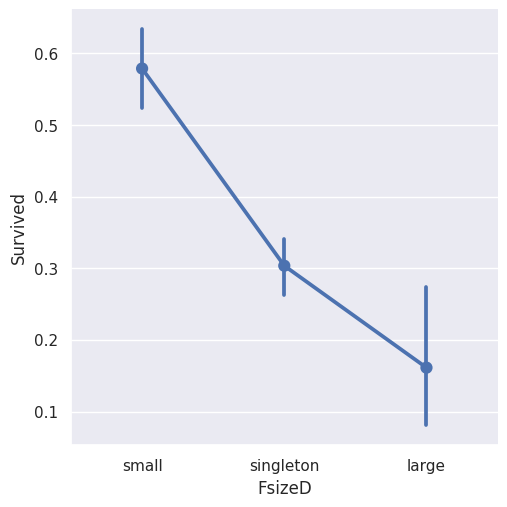

In [ ]:
sns.factorplot(x="FsizeD", y="Survived", data=titanic);
# need to be fixed

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


['okay', 'good', 'short', 'long']
Categories (4, object): ['short' < 'okay' < 'good' < 'long']


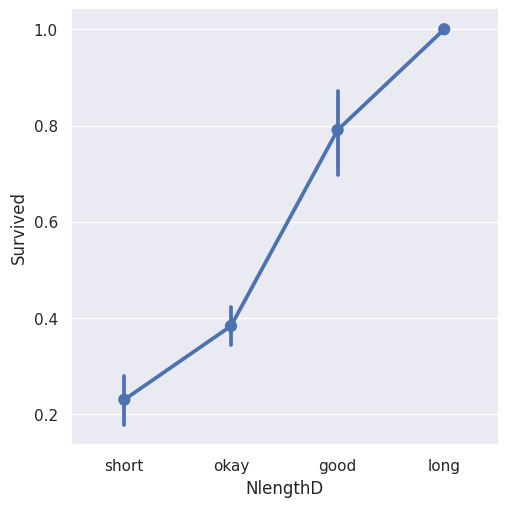

In [ ]:
#Create feature for length of name
# The .apply method generates a new series
titanic["NameLength"] = titanic["Name"].apply(lambda x: len(x))

titanic_test["NameLength"] = titanic_test["Name"].apply(lambda x: len(x))
#print(titanic["NameLength"].value_counts())

bins = [0, 20, 40, 57, 85]
group_names = ['short', 'okay', 'good', 'long']
titanic['NlengthD'] = pd.cut(titanic['NameLength'], bins, labels=group_names)
titanic_test['NlengthD'] = pd.cut(titanic_test['NameLength'], bins, labels=group_names)

sns.factorplot(x="NlengthD", y="Survived", data=titanic)
print(titanic["NlengthD"].unique())

In [ ]:
import re

#A function to get the title from a name.
def get_title(name):
    # Use a regular expression to search for a title.  Titles always consist of capital and lowercase letters, and end with a period.
    title_search = re.search(' ([A-Za-z]+)\.', name)
    #If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""

#Get all the titles and print how often each one occurs.
titles = titanic["Name"].apply(get_title)
print(pd.value_counts(titles))


#Add in the title column.
titanic["Title"] = titles

# Titles with very low cell counts to be combined to "rare" level
rare_title = ['Dona', 'Lady', 'Countess','Capt', 'Col', 'Don',
                'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer']

# Also reassign mlle, ms, and mme accordingly
titanic.loc[titanic["Title"] == "Mlle", "Title"] = 'Miss'
titanic.loc[titanic["Title"] == "Ms", "Title"] = 'Miss'
titanic.loc[titanic["Title"] == "Mme", "Title"] = 'Mrs'
titanic.loc[titanic["Title"] == "Dona", "Title"] = 'Rare Title'
titanic.loc[titanic["Title"] == "Lady", "Title"] = 'Rare Title'
titanic.loc[titanic["Title"] == "Countess", "Title"] = 'Rare Title'
titanic.loc[titanic["Title"] == "Capt", "Title"] = 'Rare Title'
titanic.loc[titanic["Title"] == "Col", "Title"] = 'Rare Title'
titanic.loc[titanic["Title"] == "Don", "Title"] = 'Rare Title'
titanic.loc[titanic["Title"] == "Major", "Title"] = 'Rare Title'
titanic.loc[titanic["Title"] == "Rev", "Title"] = 'Rare Title'
titanic.loc[titanic["Title"] == "Sir", "Title"] = 'Rare Title'
titanic.loc[titanic["Title"] == "Jonkheer", "Title"] = 'Rare Title'
titanic.loc[titanic["Title"] == "Dr", "Title"] = 'Rare Title'

#titanic.loc[titanic["Title"].isin(['Dona', 'Lady', 'Countess','Capt', 'Col', 'Don',
#                'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer']), "Title"] = 'Rare Title'

#titanic[titanic['Title'].isin(['Dona', 'Lady', 'Countess'])]
#titanic.query("Title in ('Dona', 'Lady', 'Countess')")

titanic["Title"].value_counts()


titles = titanic_test["Name"].apply(get_title)
print(pd.value_counts(titles))

#Add in the title column.
titanic_test["Title"] = titles

# Titles with very low cell counts to be combined to "rare" level
rare_title = ['Dona', 'Lady', 'Countess','Capt', 'Col', 'Don',
                'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer']

# Also reassign mlle, ms, and mme accordingly
titanic_test.loc[titanic_test["Title"] == "Mlle", "Title"] = 'Miss'
titanic_test.loc[titanic_test["Title"] == "Ms", "Title"] = 'Miss'
titanic_test.loc[titanic_test["Title"] == "Mme", "Title"] = 'Mrs'
titanic_test.loc[titanic_test["Title"] == "Dona", "Title"] = 'Rare Title'
titanic_test.loc[titanic_test["Title"] == "Lady", "Title"] = 'Rare Title'
titanic_test.loc[titanic_test["Title"] == "Countess", "Title"] = 'Rare Title'
titanic_test.loc[titanic_test["Title"] == "Capt", "Title"] = 'Rare Title'
titanic_test.loc[titanic_test["Title"] == "Col", "Title"] = 'Rare Title'
titanic_test.loc[titanic_test["Title"] == "Don", "Title"] = 'Rare Title'
titanic_test.loc[titanic_test["Title"] == "Major", "Title"] = 'Rare Title'
titanic_test.loc[titanic_test["Title"] == "Rev", "Title"] = 'Rare Title'
titanic_test.loc[titanic_test["Title"] == "Sir", "Title"] = 'Rare Title'
titanic_test.loc[titanic_test["Title"] == "Jonkheer", "Title"] = 'Rare Title'
titanic_test.loc[titanic_test["Title"] == "Dr", "Title"] = 'Rare Title'

titanic_test["Title"].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Name, dtype: int64
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Name, dtype: int64


Mr            240
Miss           79
Mrs            72
Master         21
Rare Title      6
Name: Title, dtype: int64

In [ ]:
# tickets
titanic["Ticket"].tail()

886        211536
887        112053
888    W./C. 6607
889        111369
890        370376
Name: Ticket, dtype: object

In [ ]:
titanic["TicketNumber"] = titanic["Ticket"].str.extract('(\d{2,})', expand=True)
titanic["TicketNumber"] = titanic["TicketNumber"].apply(pd.to_numeric)


titanic_test["TicketNumber"] = titanic_test["Ticket"].str.extract('(\d{2,})', expand=True)
titanic_test["TicketNumber"] = titanic_test["TicketNumber"].apply(pd.to_numeric)

In [ ]:
#some rows in ticket column dont have numeric value so we got NaN there
titanic[titanic["TicketNumber"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Deck_order,FamilySize,FsizeD,NameLength,NlengthD,Title,TicketNumber
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S,Z,8,1,singleton,19,short,Mr,NaN
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S,Z,8,1,singleton,28,okay,Mr,NaN
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S,Z,8,1,singleton,31,okay,Mr,NaN
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S,Z,8,1,singleton,19,short,Mr,NaN
772,773,0,2,"Mack, Mrs. (Mary)",female,57.0,0,0,S.O./P.P. 3,10.5,E77,S,E,4,1,singleton,17,short,Mrs,NaN
841,842,0,2,"Mudd, Mr. Thomas Charles",male,16.0,0,0,S.O./P.P. 3,10.5,NaN,S,Z,8,1,singleton,24,okay,Mr,NaN


In [ ]:
titanic.TicketNumber.fillna(titanic["TicketNumber"].median(), inplace=True)
titanic_test.TicketNumber.fillna(titanic_test["TicketNumber"].median(), inplace=True)

In [ ]:
# converting categorical to numerical variables
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

labelEnc=LabelEncoder()

cat_vars=['Embarked','Sex',"Title","FsizeD","NlengthD",'Deck']
for col in cat_vars:
    titanic[col]=labelEnc.fit_transform(titanic[col])
    titanic_test[col]=labelEnc.fit_transform(titanic_test[col])

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Deck_order,FamilySize,FsizeD,NameLength,NlengthD,Title,TicketNumber
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2,8,8,2,2,23,2,2,21171.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0,2,2,2,2,51,0,3,17599.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,8,8,1,1,22,2,1,3101282.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2,2,2,2,2,44,0,3,113803.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2,8,8,1,1,24,2,2,373450.0


/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


AttributeError: ignored

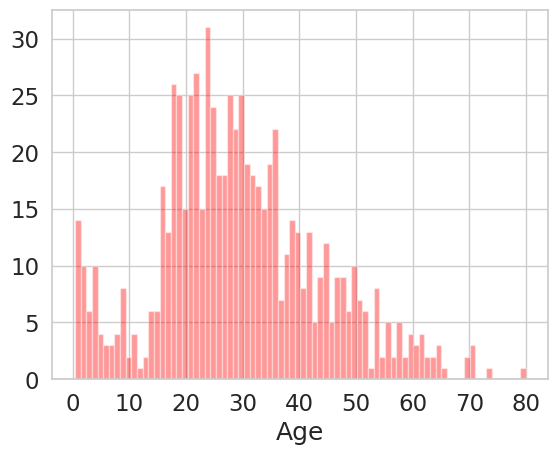

In [ ]:
# fill null values in age with random forest (median for numerical, mode for categorical usually)
with sns.plotting_context("notebook",font_scale=1.5):
    sns.set_style("whitegrid")
    sns.distplot(titanic["Age"].dropna(),
                 bins=80,
                 kde=False,
                 color="red")
    sns.plt.title("Age Distribution")
    plt.ylabel("Count");

In [ ]:
from sklearn.ensemble import RandomForestRegressor
#predicting missing values in age using Random Forest
def fill_missing_age(df):

    #Feature set
    age_df = df[['Age','Embarked','Fare', 'Parch', 'SibSp',
                 'TicketNumber', 'Title','Pclass','FamilySize',
                 'FsizeD','NameLength',"NlengthD",'Deck']]
    # Split sets into train and test
    train  = age_df.loc[ (df.Age.notnull()) ]# known Age values
    test = age_df.loc[ (df.Age.isnull()) ]# null Ages

    # All age values are stored in a target array
    y = train.values[:, 0]

    # All the other values are stored in the feature array
    X = train.values[:, 1::]

    # Create and fit a model
    rtr = RandomForestRegressor(n_estimators=2000, n_jobs=-1)
    rtr.fit(X, y)

    # Use the fitted model to predict the missing values
    predictedAges = rtr.predict(test.values[:, 1::])

    # Assign those predictions to the full data set
    df.loc[ (df.Age.isnull()), 'Age' ] = predictedAges

    return df

In [ ]:
titanic=fill_missing_age(titanic)
titanic_test=fill_missing_age(titanic_test)

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


AttributeError: ignored

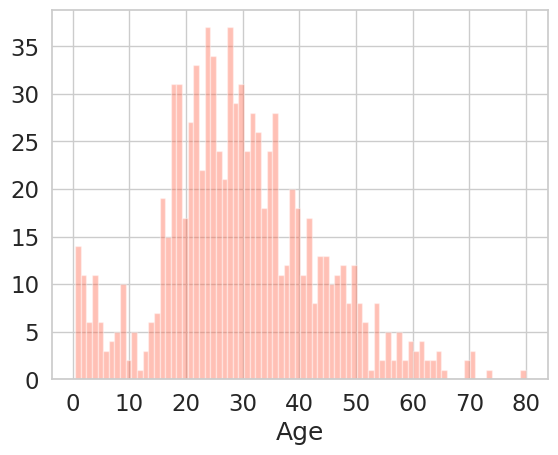

In [ ]:
with sns.plotting_context("notebook",font_scale=1.5):
    sns.set_style("whitegrid")
    sns.distplot(titanic["Age"].dropna(),
                 bins=80,
                 kde=False,
                 color="tomato")
    sns.plt.title("Age Distribution")
    plt.ylabel("Count")
    plt.xlim((15,100));

In [ ]:
# feature scaling: Age, Fare are measured on different scales, so we need to do Feature Scaling first before we proceed with predictions.
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(titanic[['Age', 'Fare']])
titanic[['Age', 'Fare']] = std_scale.transform(titanic[['Age', 'Fare']])


std_scale = preprocessing.StandardScaler().fit(titanic_test[['Age', 'Fare']])
titanic_test[['Age', 'Fare']] = std_scale.transform(titanic_test[['Age', 'Fare']])

In [ ]:
titanic.corr()["Survived"]

<ipython-input-49-5e42612b8208>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  titanic.corr()["Survived"]


PassengerId    -0.005007
Survived        1.000000
Pclass         -0.338481
Sex            -0.543351
Age            -0.079227
SibSp          -0.035322
Parch           0.081629
Fare            0.257307
Embarked       -0.174199
Deck           -0.301116
Deck_order     -0.301116
FamilySize      0.016639
FsizeD          0.283810
NameLength      0.332350
NlengthD       -0.312234
Title          -0.071174
TicketNumber   -0.096161
Name: Survived, dtype: float64

In [ ]:
# prediction of survival- Logistic regression (Binary class classification)
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

predictors = ["Pclass", "Sex", "Fare", "Embarked","Deck","Age",
              "FsizeD", "NlengthD","Title","Parch"]

# Initialize our algorithm
lr = LogisticRegression(random_state=1)
# Compute the accuracy score for all the cross validation folds.
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=50)

scores = cross_val_score(lr, titanic[predictors],
                                          titanic["Survived"],scoring='f1', cv=cv)
# Take the mean of the scores (because we have one for each fold)
print(scores.mean())

0.7546695979586762


In [ ]:
from sklearn import model_selection
# Random forest
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold
from sklearn.ensemble import RandomForestClassifier

import numpy as np
predictors = ["Pclass", "Sex", "Age",
              "Fare", "Embarked"]

# Initialize our algorithm with the default paramters
# n_estimators is the number of trees we want to make
# min_samples_split is the minimum number of rows we need to make a split
# min_samples_leaf is the minimum number of samples we can have at the place where a tree branch ends (the bottom points of the tree)
rf = RandomForestClassifier(random_state=1, n_estimators=10, min_samples_split=2,
                            min_samples_leaf=1)
kf = KFold(n_splits=5, shuffle=True, random_state=1)
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=50)

predictions = model_selection.cross_val_predict(rf, titanic[predictors],titanic["Survived"],cv=kf)
predictions = pd.Series(predictions)
scores = cross_val_score(rf, titanic[predictors], titanic["Survived"],
                                          scoring='f1', cv=kf)
# Take the mean of the scores (because we have one for each fold)
print(scores.mean())

0.7434547240126992


In [ ]:
predictors = ["Pclass", "Sex", "Age","Fare","NlengthD","NameLength", "FsizeD", "Title","Deck","TicketNumber"]
rf = RandomForestClassifier(random_state=1, n_estimators=50, max_depth=9,min_samples_split=6, min_samples_leaf=4)
rf.fit(titanic[predictors],titanic["Survived"])
kf = KFold(n_splits=5, random_state=None)
predictions = cross_val_predict(rf, titanic[predictors],titanic["Survived"],cv=kf)
predictions = pd.Series(predictions)
scores = cross_val_score(rf, titanic[predictors], titanic["Survived"],scoring='f1', cv=kf)
# Take the mean of the scores (because we have one for each fold)
print(scores.mean())

0.7748692774803876


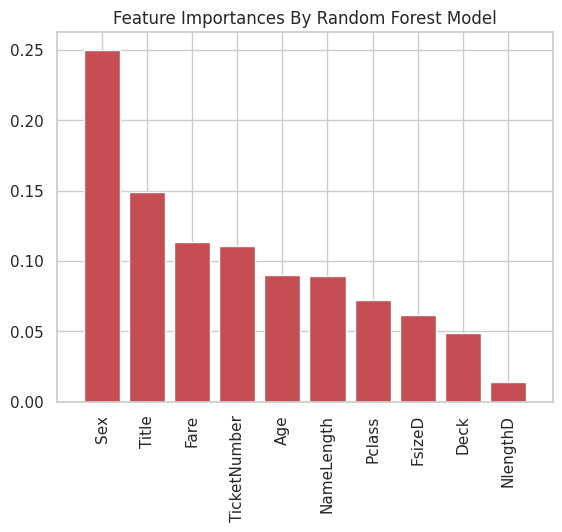

In [ ]:
#feature importance

importances=rf.feature_importances_
std = np.std([rf.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
sorted_important_features=[]
for i in indices:
    sorted_important_features.append(predictors[i])
#predictors=titanic.columns
plt.figure()
plt.title("Feature Importances By Random Forest Model")
plt.bar(range(np.size(predictors)), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(np.size(predictors)), sorted_important_features, rotation='vertical')

plt.xlim([-1, np.size(predictors)]);

In [ ]:
# gradient boosting
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.cross_validation import KFold
%matplotlib inline
import matplotlib.pyplot as plt
#predictors = ["Pclass", "Sex", "Age", "Fare",
 #             "FsizeD", "Embarked", "NlengthD","Deck","TicketNumber"]
predictors = ["Pclass", "Sex", "Age",
              "Fare","NlengthD", "FsizeD","NameLength","Deck","Embarked"]
# Perform feature selection
selector = SelectKBest(f_classif, k=5)
selector.fit(titanic[predictors], titanic["Survived"])

# Get the raw p-values for each feature, and transform from p-values into scores
scores = -np.log10(selector.pvalues_)

indices = np.argsort(scores)[::-1]

sorted_important_features=[]
for i in indices:
    sorted_important_features.append(predictors[i])

plt.figure()
plt.title("Feature Importances By SelectKBest")
plt.bar(range(np.size(predictors)), scores[indices],
       color="seagreen", yerr=std[indices], align="center")
plt.xticks(range(np.size(predictors)), sorted_important_features, rotation='vertical')

plt.xlim([-1, np.size(predictors)]);

ModuleNotFoundError: ignored

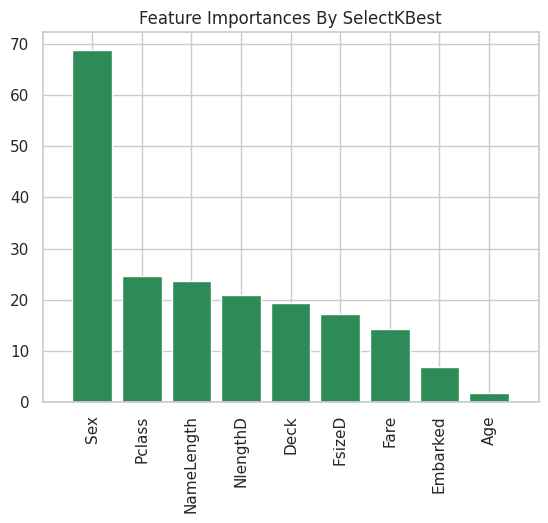

In [ ]:
# gradient boosting
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import KFold
%matplotlib inline
import matplotlib.pyplot as plt
#predictors = ["Pclass", "Sex", "Age", "Fare", #             "FsizeD", "Embarked", "NlengthD","Deck","TicketNumber"]
predictors = ["Pclass", "Sex", "Age",              "Fare","NlengthD", "FsizeD","NameLength","Deck","Embarked"]
# Perform feature selection
selector = SelectKBest(f_classif, k=5)
selector.fit(titanic[predictors], titanic["Survived"])

# Get the raw p-values for each feature, and transform from p-values into scores
scores = -np.log10(selector.pvalues_)

indices = np.argsort(scores)[::-1]

sorted_important_features=[]
for i in indices:
    sorted_important_features.append(predictors[i])

plt.figure()
plt.title("Feature Importances By SelectKBest")
plt.bar(range(np.size(predictors)), scores[indices],
       color="seagreen", align="center")
plt.xticks(range(np.size(predictors)), sorted_important_features, rotation='vertical')

plt.xlim([-1, np.size(predictors)]);

In [ ]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

predictors = ["Pclass", "Sex", "Age", "Fare", "Embarked","NlengthD",
              "FsizeD", "Title","Deck"]

# Initialize our algorithm
lr = LogisticRegression(random_state=1)

# Compute the accuracy score for all the cross validation folds.
cv = model_selection.ShuffleSplit(n_splits=10, test_size=0.3, random_state=50)
scores = model_selection.cross_val_score(lr, titanic[predictors], titanic["Survived"], scoring='f1', cv=cv)

print(scores.mean())

0.7653998744254175


In [ ]:
# Adaboost
from sklearn.ensemble import AdaBoostClassifier
predictors = ["Pclass", "Sex", "Age", "Fare", "Embarked","NlengthD",
              "FsizeD", "Title","Deck","TicketNumber"]
adb=AdaBoostClassifier()
adb.fit(titanic[predictors],titanic["Survived"])
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=50)
scores = cross_val_score(adb, titanic[predictors], titanic["Survived"], scoring='f1',cv=cv)
print(scores.mean())

0.7718076976512624


In [ ]:
# max voting ensemble and submission
predictions=["Pclass", "Sex", "Age", "Fare", "Embarked","NlengthD",
              "FsizeD", "Title","Deck","NameLength","TicketNumber"]
from sklearn.ensemble import VotingClassifier
eclf1 = VotingClassifier(estimators=[
        ('lr', lr), ('rf', rf), ('adb', adb)], voting='soft')
eclf1 = eclf1.fit(titanic[predictors], titanic["Survived"])
predictions=eclf1.predict(titanic[predictors])
predictions

test_predictions=eclf1.predict(titanic_test[predictors])

test_predictions=test_predictions.astype(int)
submission = pd.DataFrame({
        "PassengerId": titanic_test["PassengerId"],
        "Survived": test_predictions
    })

submission.to_csv("titanic_submission.csv", index=False)

In [ ]:
import requests
import json

# Set up the request parameters
url = 'https://console.catalyst.zoho.com/ziahub/v1/project/16920000000012001/endpoints/predict'
headers = {'Content-Type': 'application/json'}
data = {"input": [[1,2,3,4,5], [6,7,8,9,10]]}

# Send the request and get the response
response = requests.post(url, headers=headers, data=json.dumps(data))

# Check if the request was successful
if response.status_code == 200:
    # Convert the response to a dictionary
    response_dict = json.loads(response.text)

    # Print the entire dictionary
    print(response_dict)

    # Access the 'result' key
    result = response_dict['result']
    print(result)
else:
    print("Request failed with status code:", response.status_code)


Request failed with status code: 400


In [ ]:
!pip install mlflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.5/83.5 kB 8.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.9/212.9 kB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.1/148.1 kB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.3 MB/s eta 0:00:00
  Created wheel for databricks-cli: filename=databricks_cli-0.17.7-py3-none-any.whl size=143860 sha256=b181ff65c83feb8264585f748cca7911b27c63b3612b03b05cb7bf0dc2f149a9
  Stored in directory: /root/.cache/pip/wheels/

In [ ]:
import pandas as pd
testdata = pd.read_csv("Iris.csv")

In [ ]:
import mlflow.sklearn

model_uri = "https://console.catalyst.zoho.com/ziahub/v1/project/16920000000012001/endpoints/predict"
model_name = "iris dataset model"
loaded_model = mlflow.sklearn.load_model(f"{model_uri}")

predictions = loaded_model.predict(testdata)

predictions_df = pd.DataFrame(predictions, columns = ["predictions"])

ValueError: ignored

In [ ]:
import requests
import pandas as pd
import json
# Load